## Task 1: Dataset Selection

Data Preprocessing:
- Use visualizations (histograms, scatter plots, bar graphs, etc.) to understand the
distribution of features and identify any potential patterns/dependencies or
outliers.
- Identify the data types of each feature (numeric, categorical, text, etc.). For
numeric data, show its characteristics like mean, median, standard deviation, etc.
- Identify and handle missing values (null values) in the data. This could involve
removing rows with missing values, fixing missing values with appropriate
strategies, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading  Data 

In [2]:
df = pd.read_csv("HCV-Egy-Data.csv")
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


### Data Exploration

array([[<Axes: title={'center': 'Age '}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Nausea/Vomting'}>],
       [<Axes: title={'center': 'Headache '}>,
        <Axes: title={'center': 'Diarrhea '}>,
        <Axes: title={'center': 'Fatigue & generalized bone ache '}>,
        <Axes: title={'center': 'Jaundice '}>,
        <Axes: title={'center': 'Epigastric pain '}>],
       [<Axes: title={'center': 'WBC'}>, <Axes: title={'center': 'RBC'}>,
        <Axes: title={'center': 'HGB'}>,
        <Axes: title={'center': 'Plat'}>,
        <Axes: title={'center': 'AST 1'}>],
       [<Axes: title={'center': 'ALT 1'}>,
        <Axes: title={'center': 'ALT4'}>,
        <Axes: title={'center': 'ALT 12'}>,
        <Axes: title={'center': 'ALT 24'}>,
        <Axes: title={'center': 'ALT 36'}>],
       [<Axes: title={'center': 'ALT 48'}>,
        <Axes: title={'center': 'ALT after 24 w'

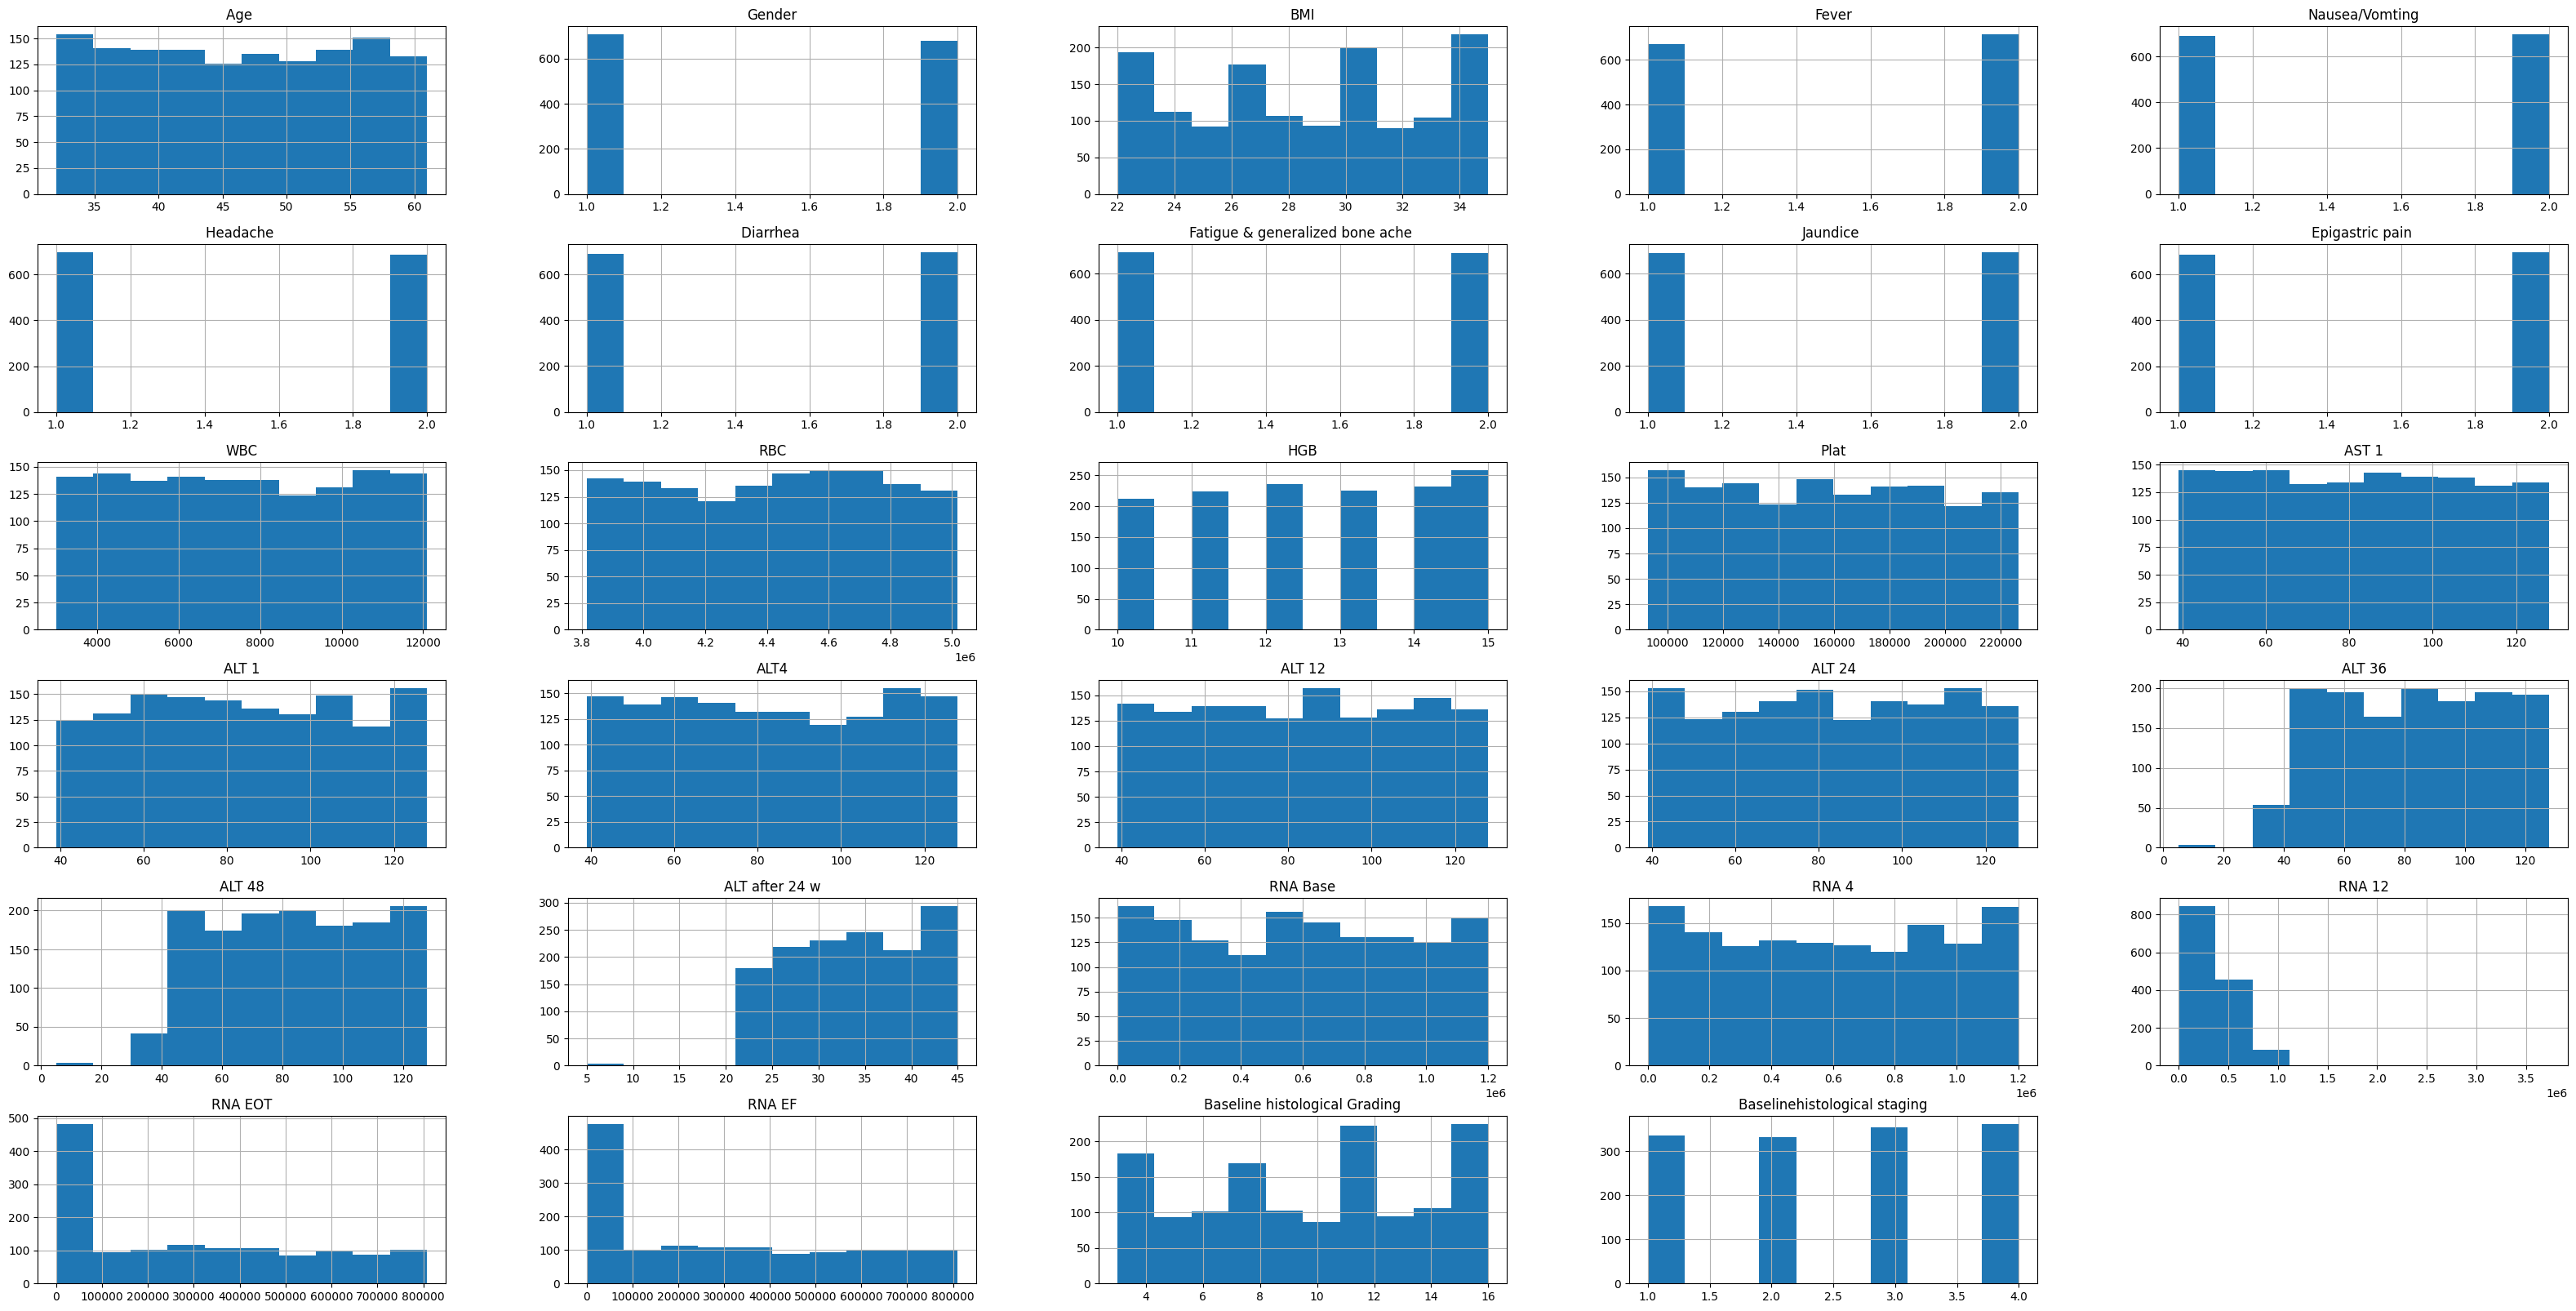

In [3]:
df.hist(figsize=(40,20))

<Axes: >

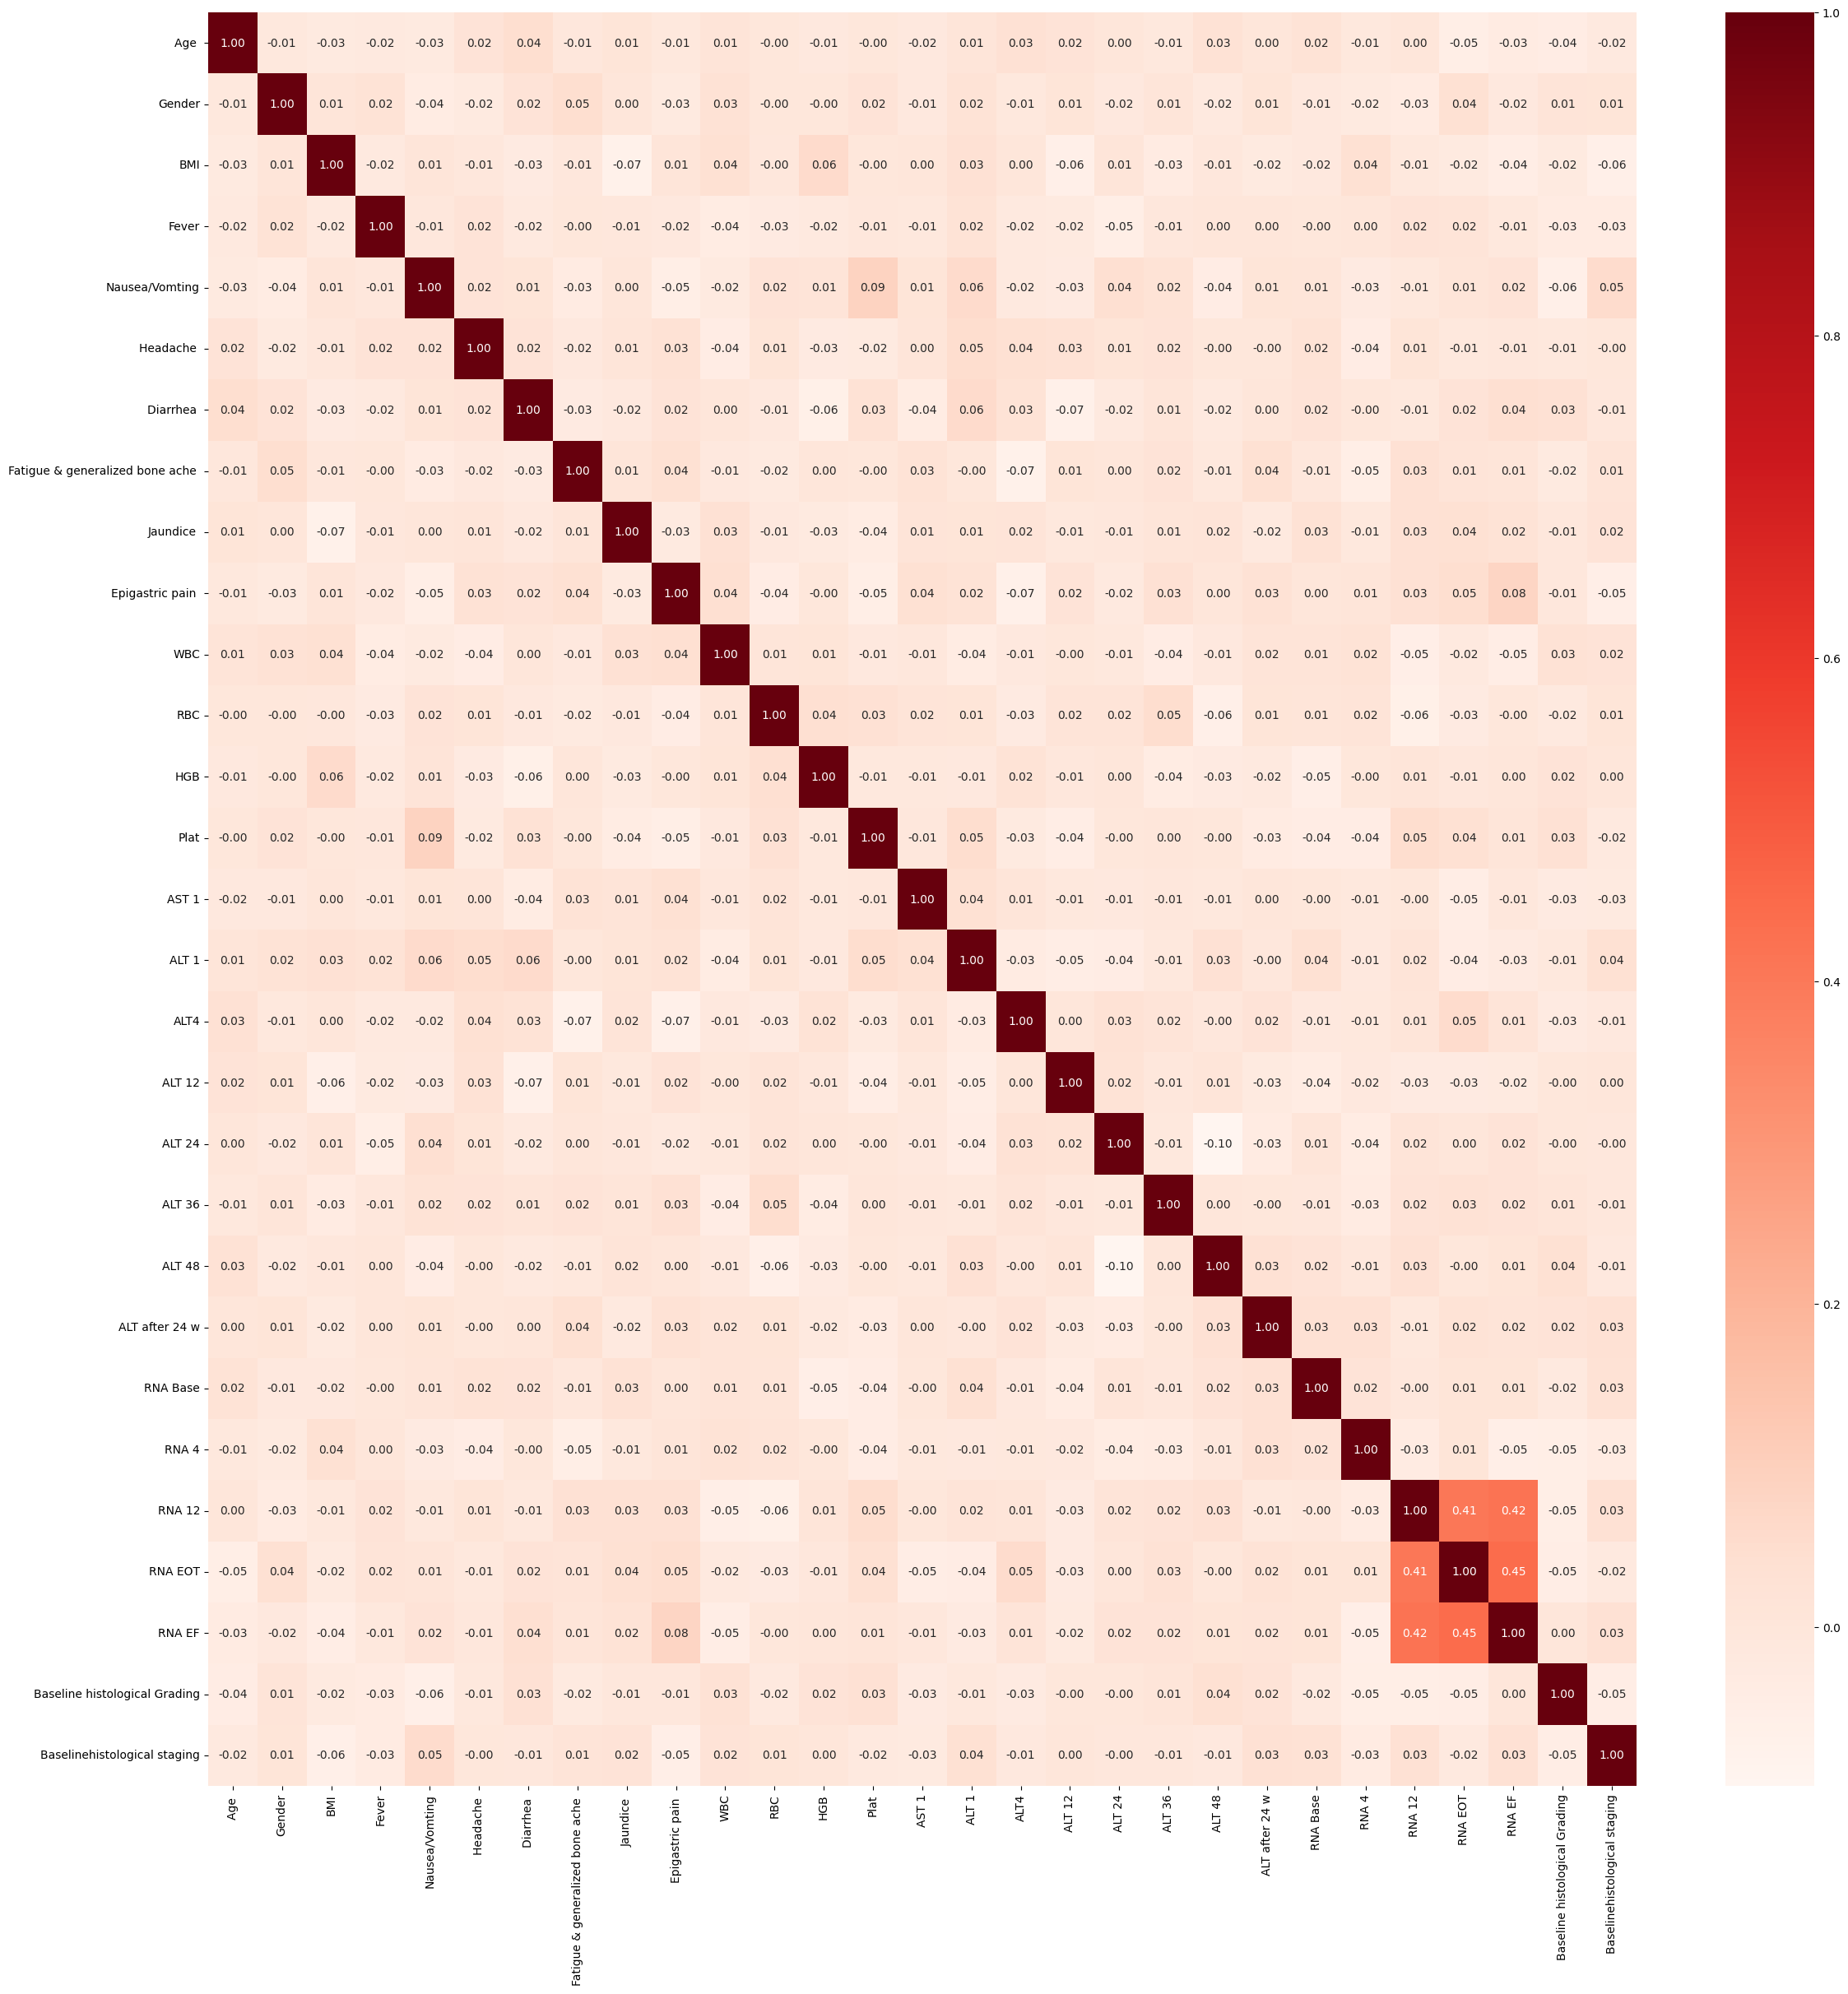

In [4]:
plt.figure(figsize=(28, 28))  # Adjust the width and height as needed

sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')

In [5]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

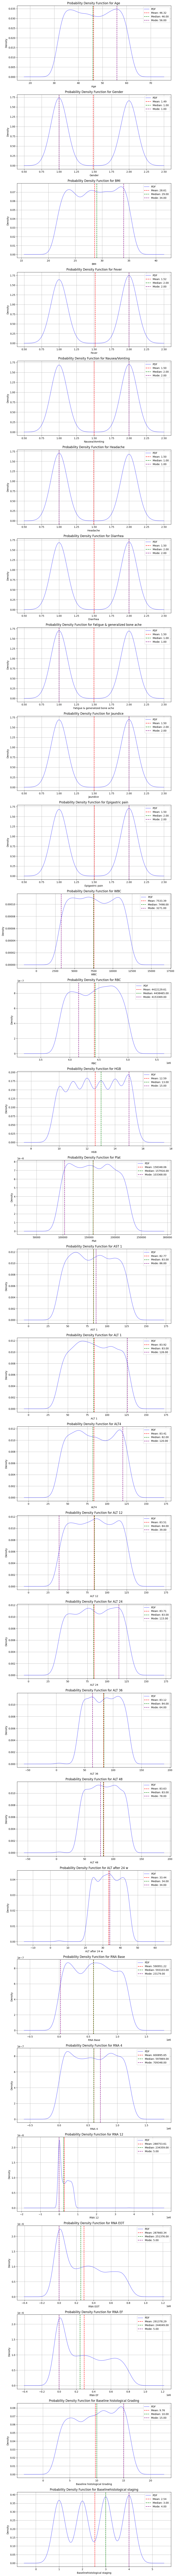

In [6]:
num_features = 29
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(df):
    # Plotting the density
    df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean , color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=median, color='green', linestyle='--', label=f'Median: {median:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=mode , color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  # Adjusted y-value for visibility

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [7]:
pd.set_option('display.max_rows', None)
df.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [8]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

Age                                    Axes(0.125,0.814746;0.227941x0.0652542)
Gender                              Axes(0.398529,0.814746;0.227941x0.0652542)
BMI                                 Axes(0.672059,0.814746;0.227941x0.0652542)
Fever                                  Axes(0.125,0.736441;0.227941x0.0652542)
Nausea/Vomting                      Axes(0.398529,0.736441;0.227941x0.0652542)
Headache                            Axes(0.672059,0.736441;0.227941x0.0652542)
Diarrhea                               Axes(0.125,0.658136;0.227941x0.0652542)
Fatigue & generalized bone ache     Axes(0.398529,0.658136;0.227941x0.0652542)
Jaundice                            Axes(0.672059,0.658136;0.227941x0.0652542)
Epigastric pain                        Axes(0.125,0.579831;0.227941x0.0652542)
WBC                                 Axes(0.398529,0.579831;0.227941x0.0652542)
RBC                                 Axes(0.672059,0.579831;0.227941x0.0652542)
HGB                                    Axes(0.125,0.

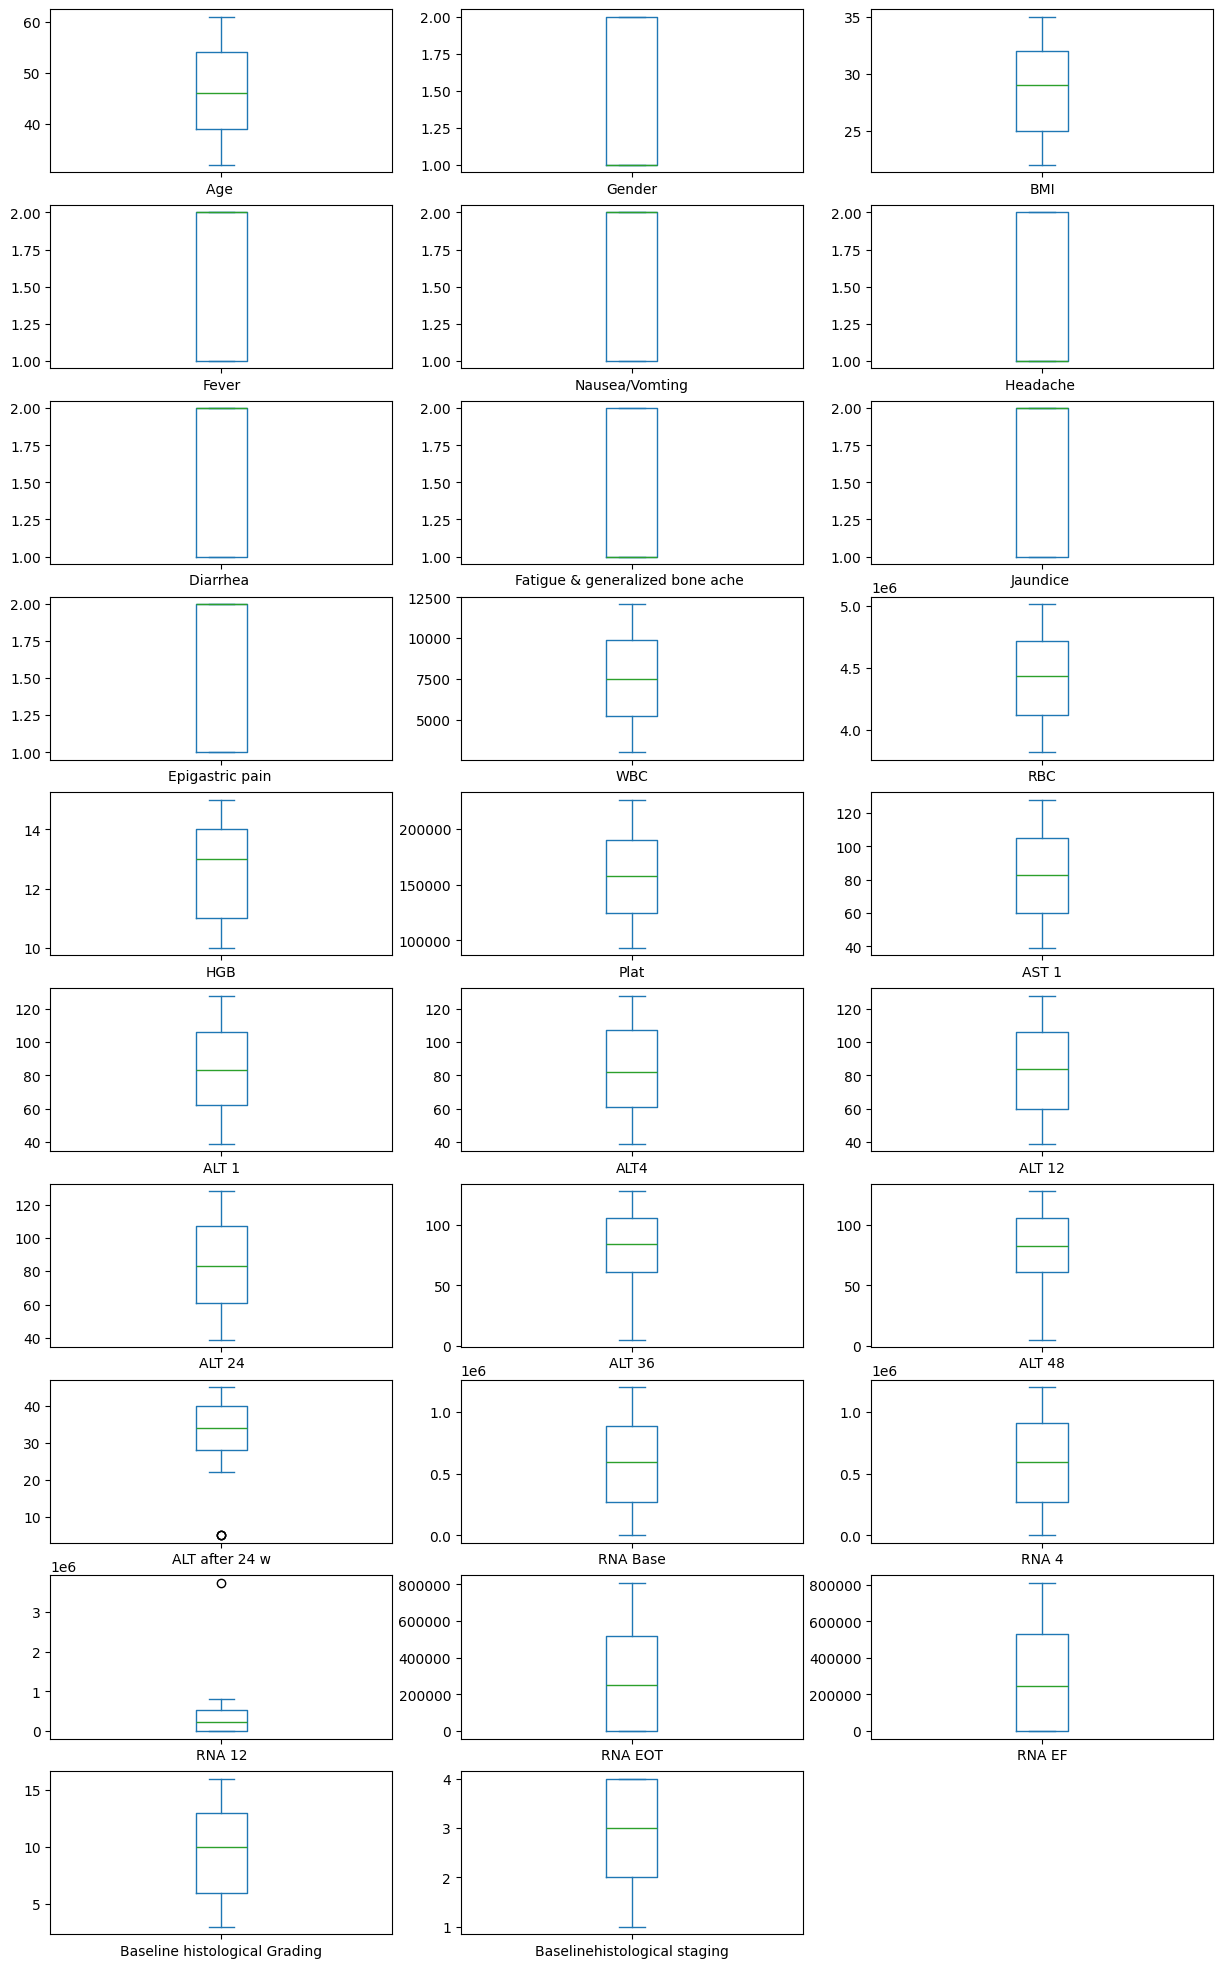

In [10]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(10,3), figsize=(15,25))

Age                                    Axes(0.125,0.814746;0.227941x0.0652542)
Gender                              Axes(0.398529,0.814746;0.227941x0.0652542)
BMI                                 Axes(0.672059,0.814746;0.227941x0.0652542)
Fever                                  Axes(0.125,0.736441;0.227941x0.0652542)
Nausea/Vomting                      Axes(0.398529,0.736441;0.227941x0.0652542)
Headache                            Axes(0.672059,0.736441;0.227941x0.0652542)
Diarrhea                               Axes(0.125,0.658136;0.227941x0.0652542)
Fatigue & generalized bone ache     Axes(0.398529,0.658136;0.227941x0.0652542)
Jaundice                            Axes(0.672059,0.658136;0.227941x0.0652542)
Epigastric pain                        Axes(0.125,0.579831;0.227941x0.0652542)
WBC                                 Axes(0.398529,0.579831;0.227941x0.0652542)
RBC                                 Axes(0.672059,0.579831;0.227941x0.0652542)
HGB                                    Axes(0.125,0.

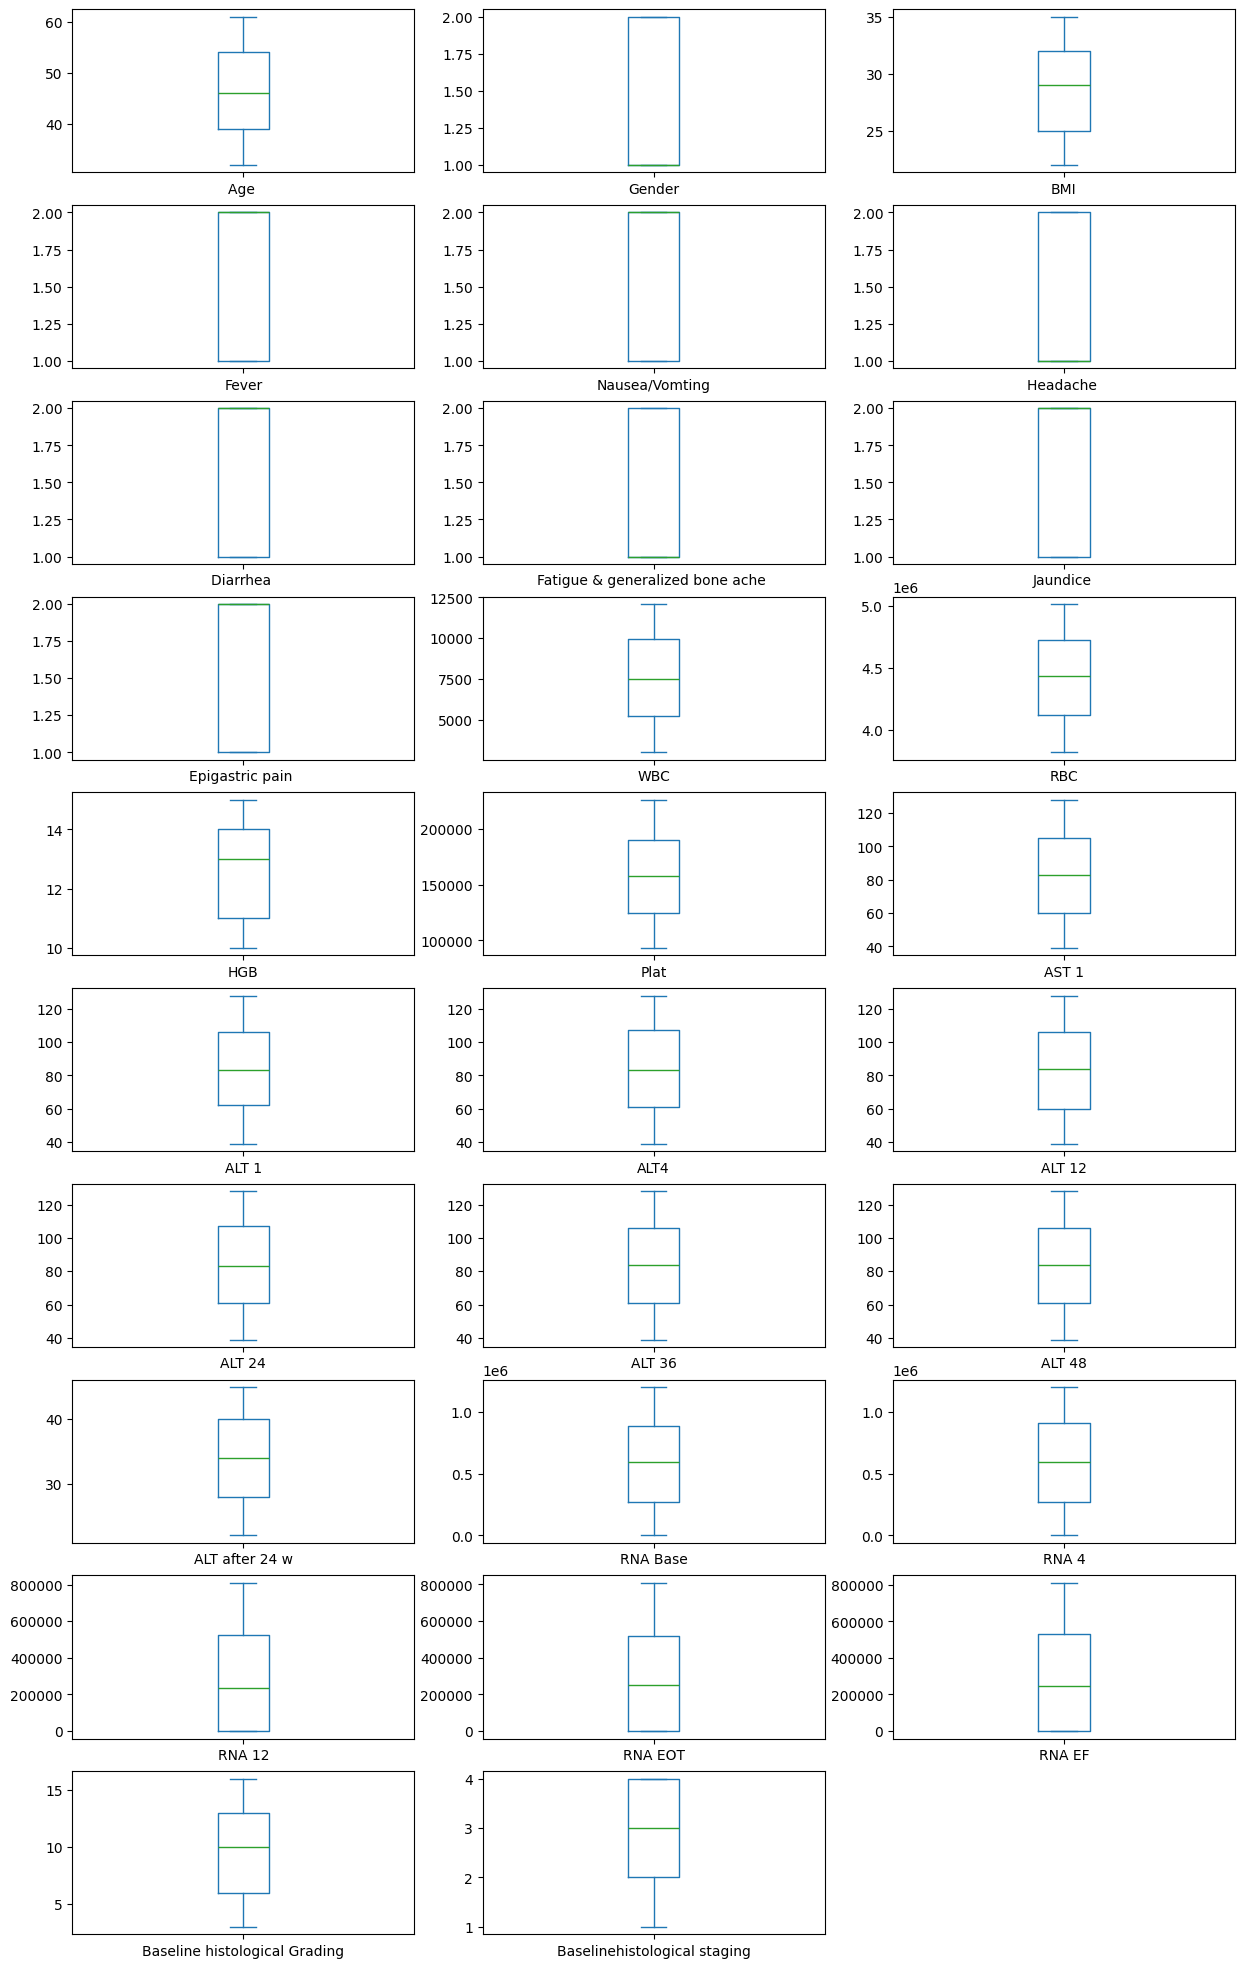

In [11]:
Q1 = np.percentile(df['ALT after 24 w'], 25)
Q3 = np.percentile(df['ALT after 24 w'], 75)
IQR = Q3 - Q1
df = df[(df['ALT after 24 w'] >= Q1 - 1.5 * IQR) & (df['ALT after 24 w'] <= Q3 + 1.5 * IQR)]

Q1 = np.percentile(df['RNA 12'], 25)
Q3 = np.percentile(df['RNA 12'], 75)
IQR = Q3 - Q1
df = df[(df['RNA 12'] >= Q1 - 1.5 * IQR) & (df['RNA 12'] <= Q3 + 1.5 * IQR)]

df.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(10,3), figsize=(15,25))